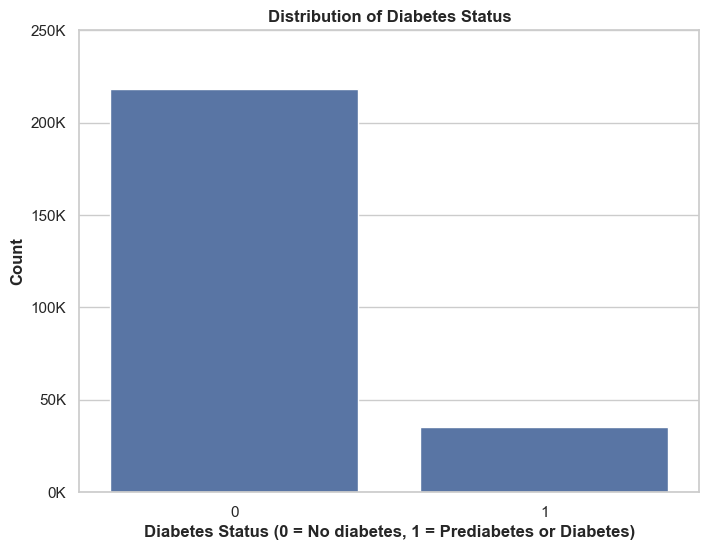

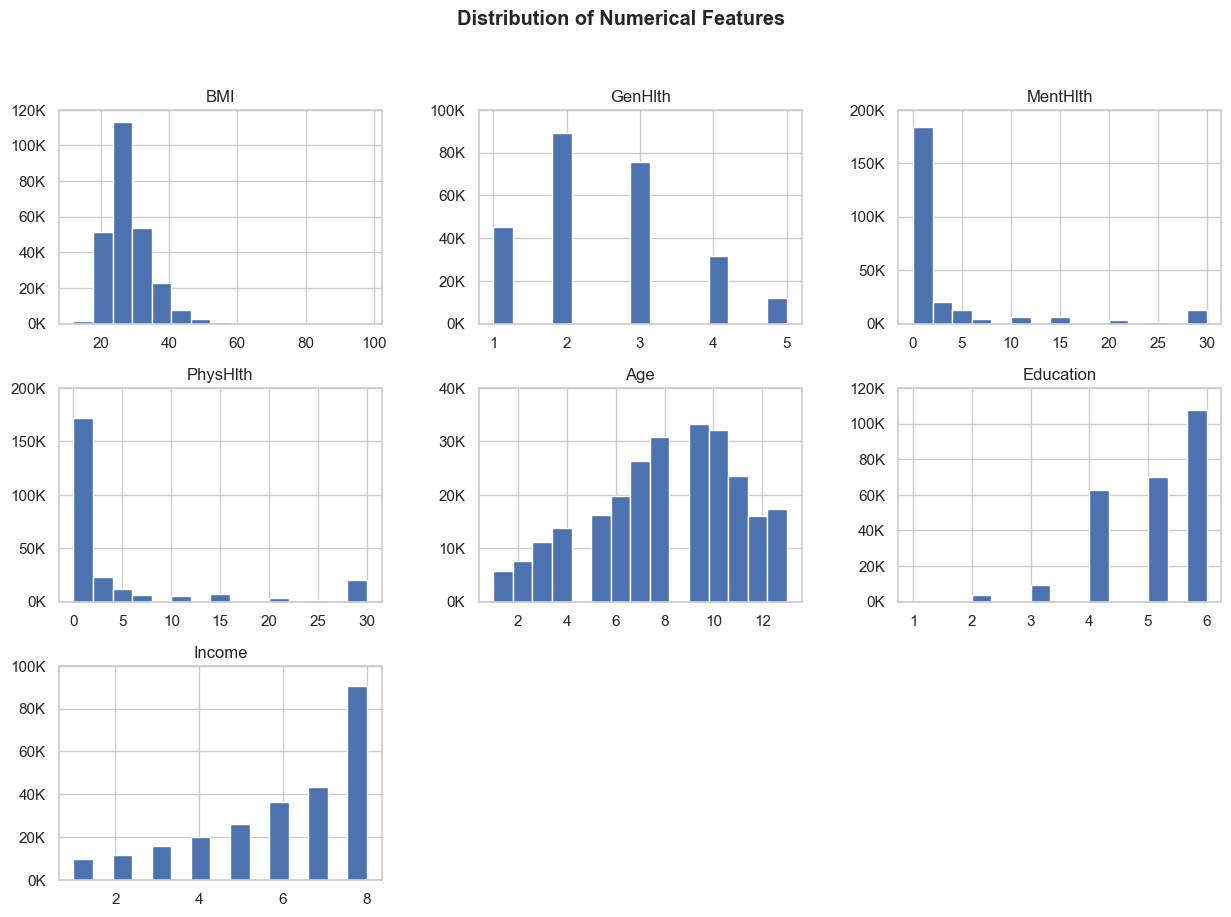

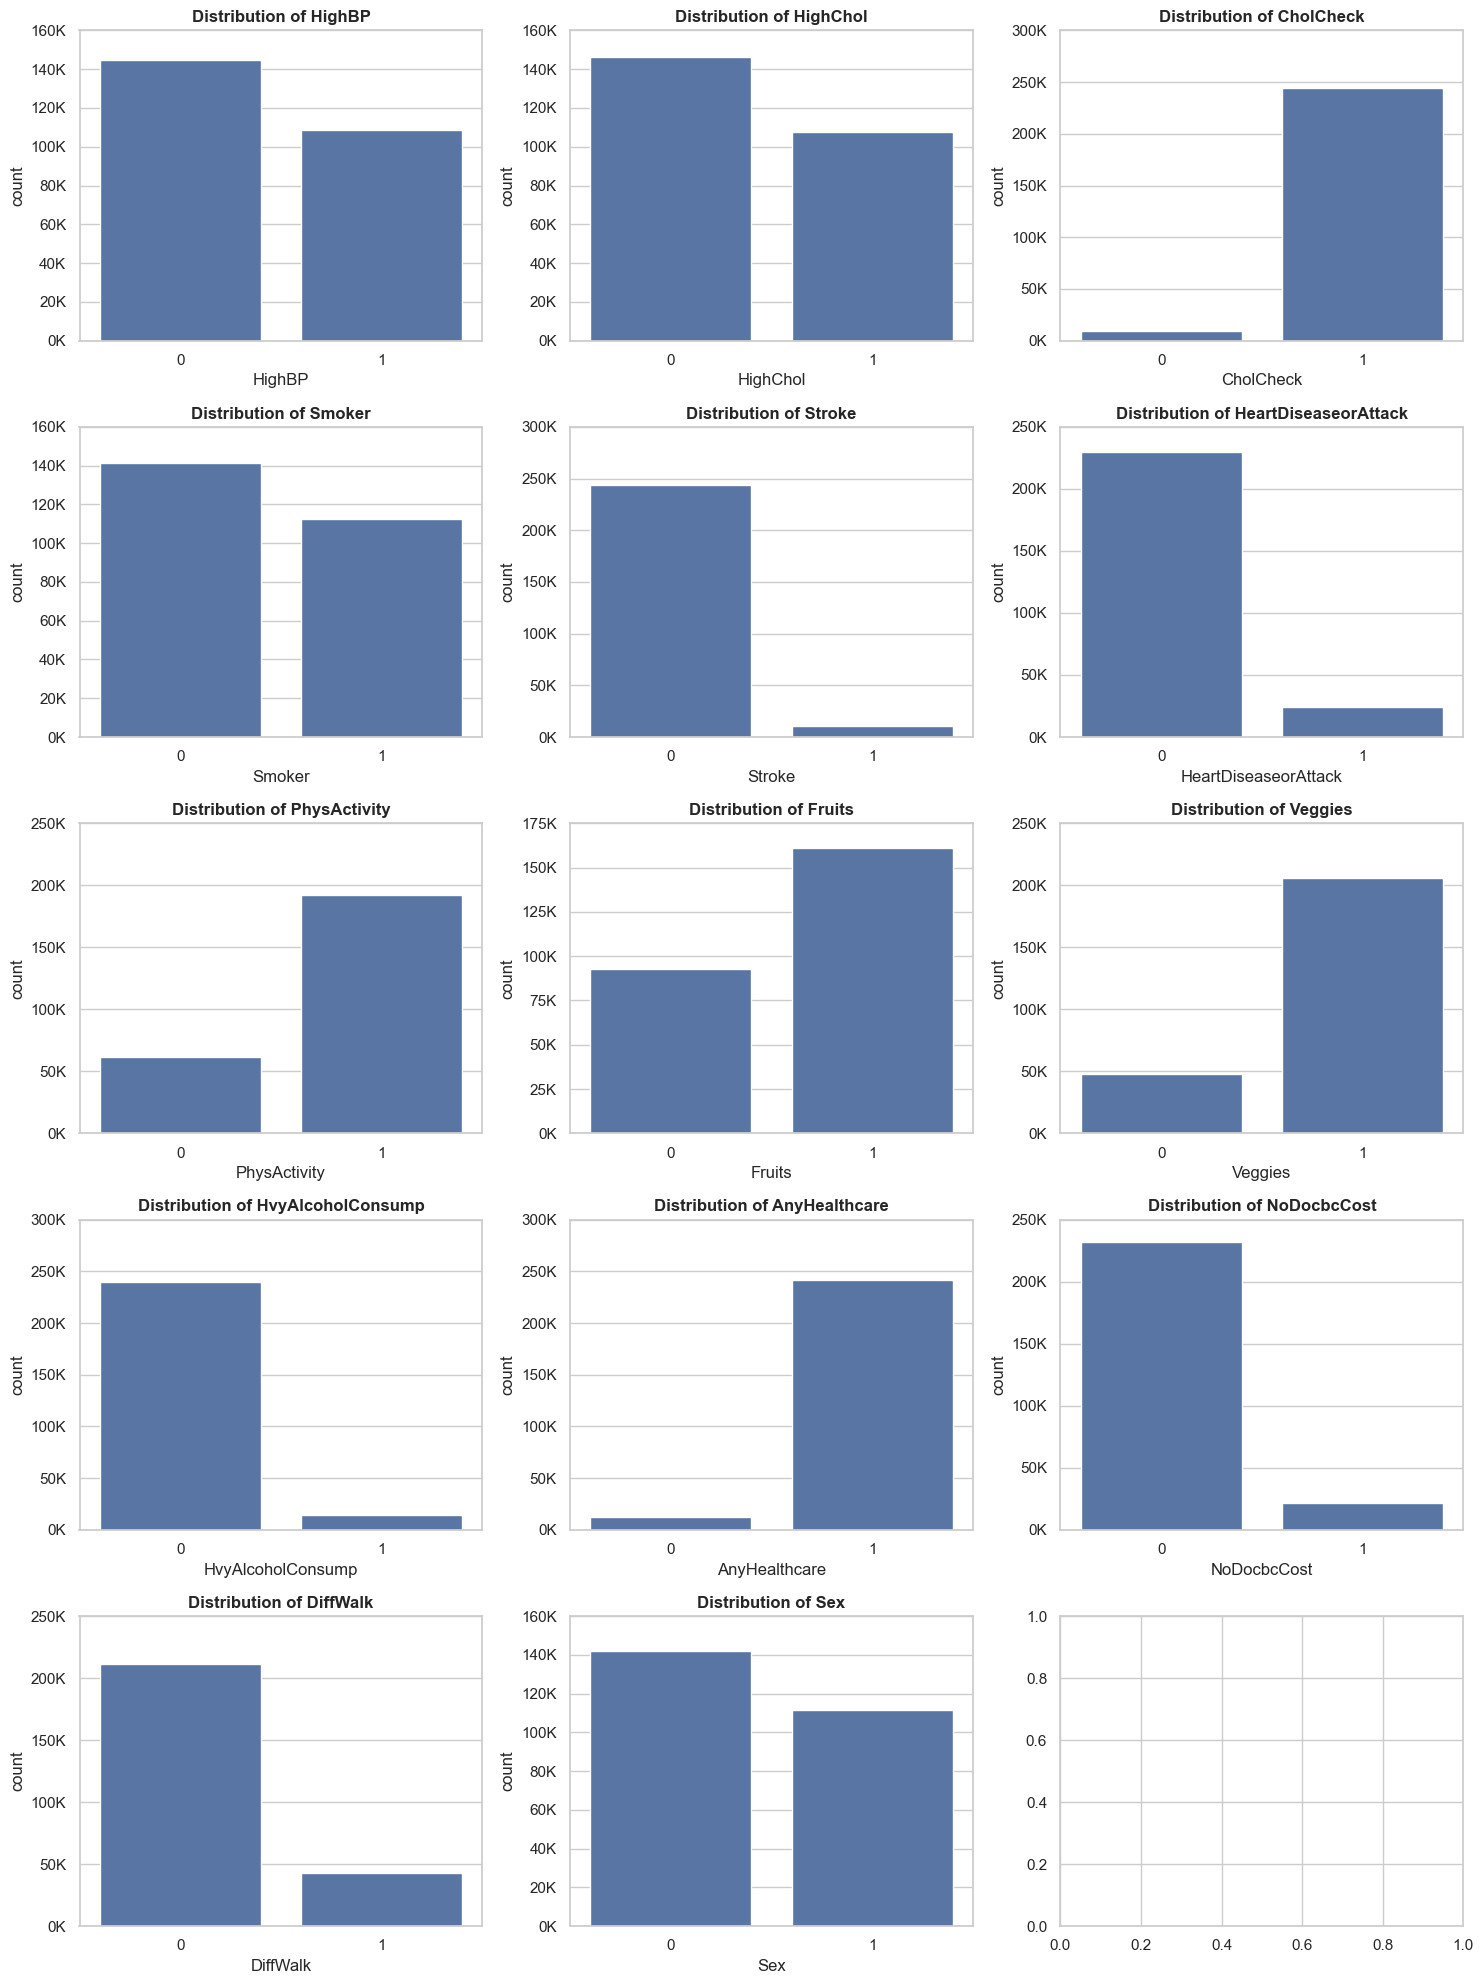

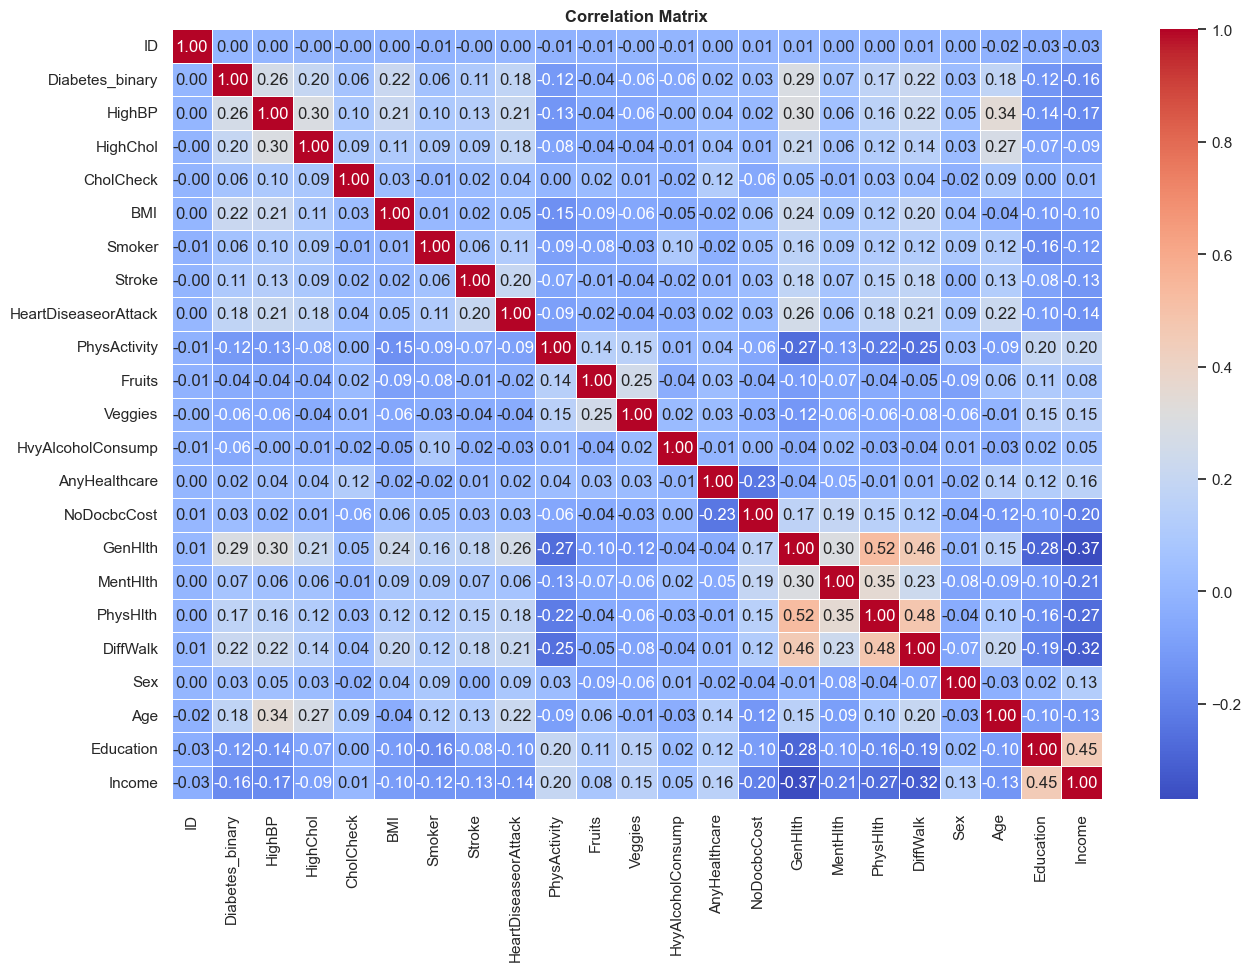

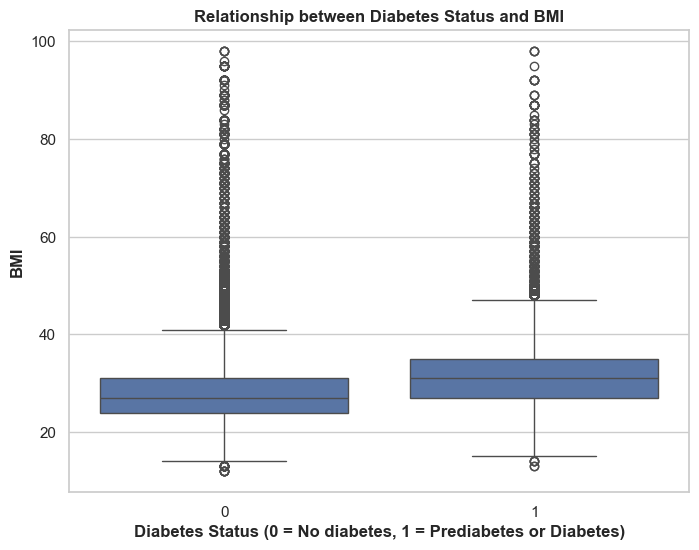

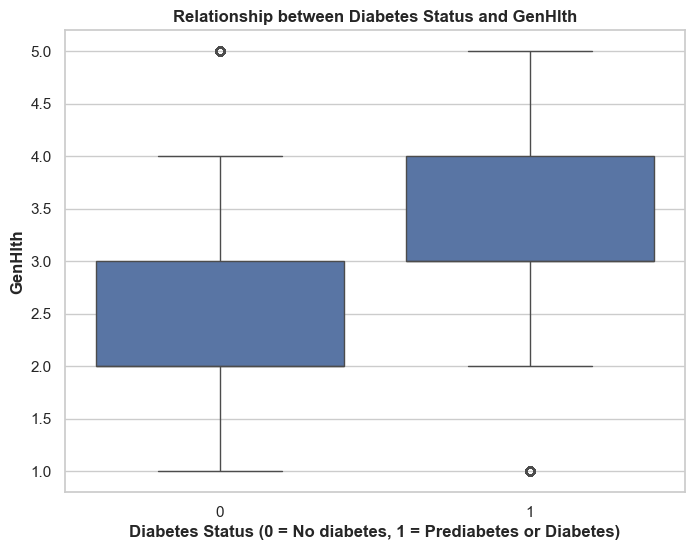

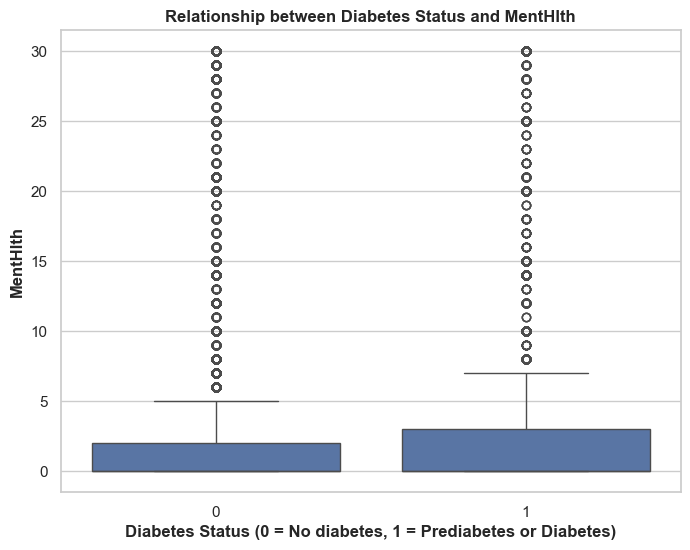

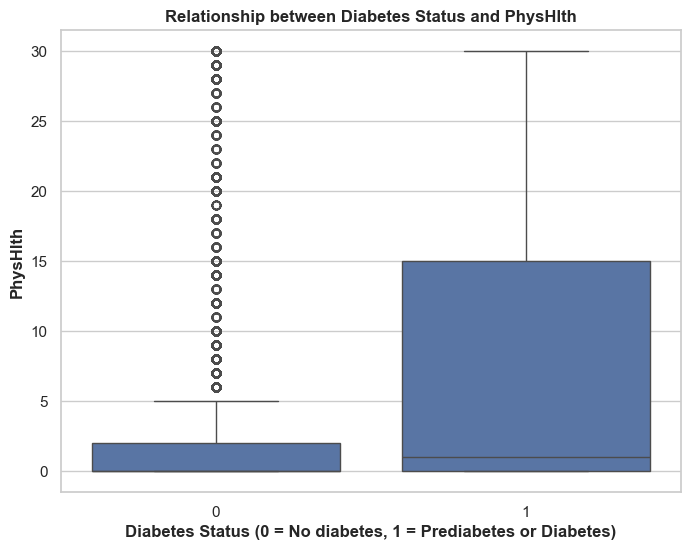

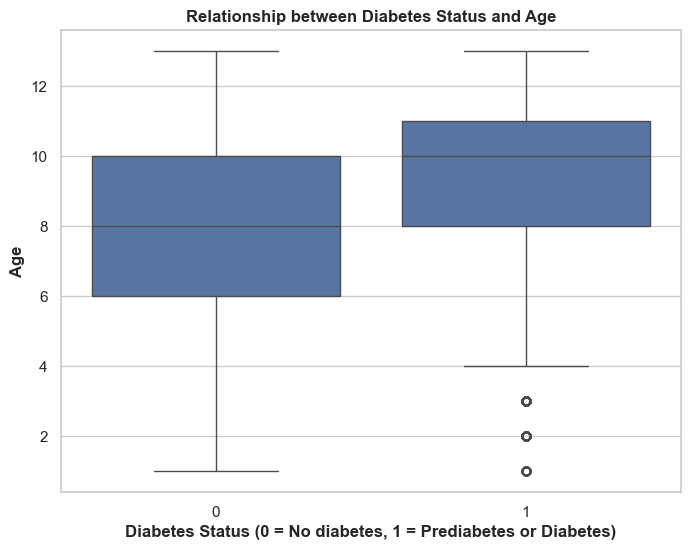

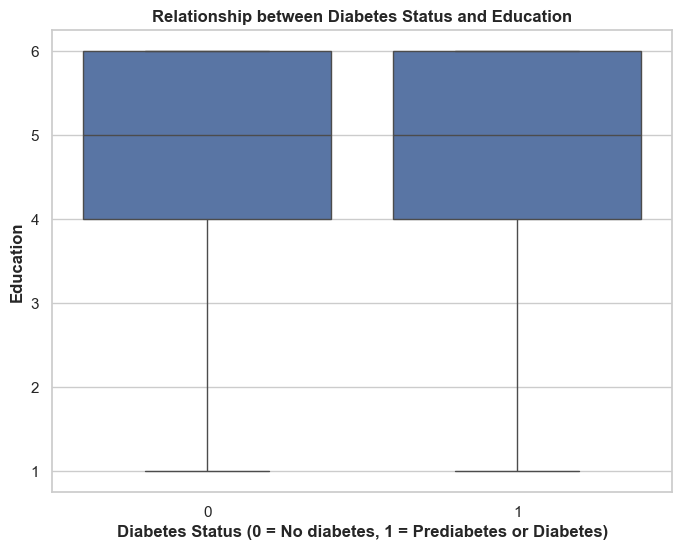

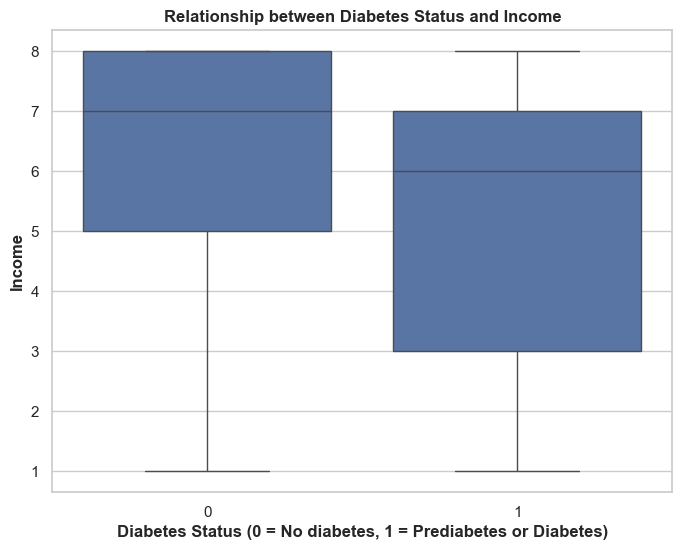

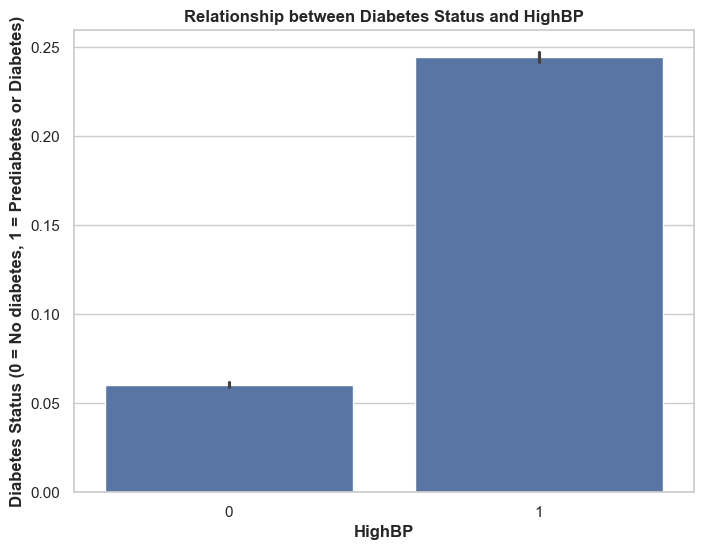

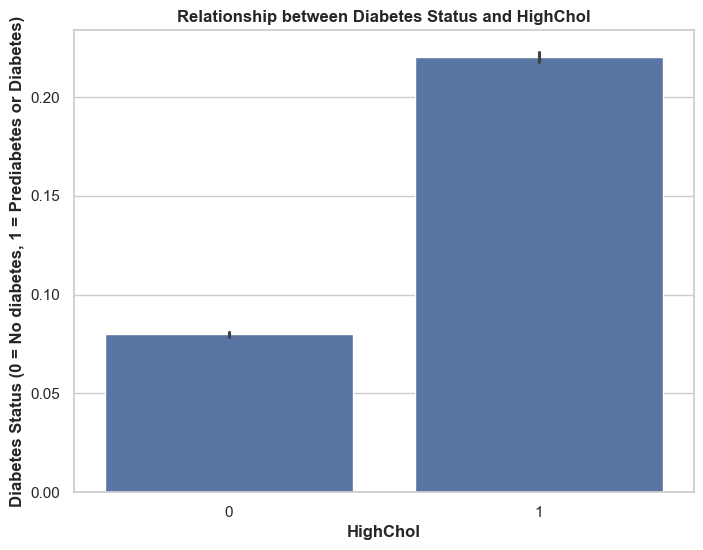

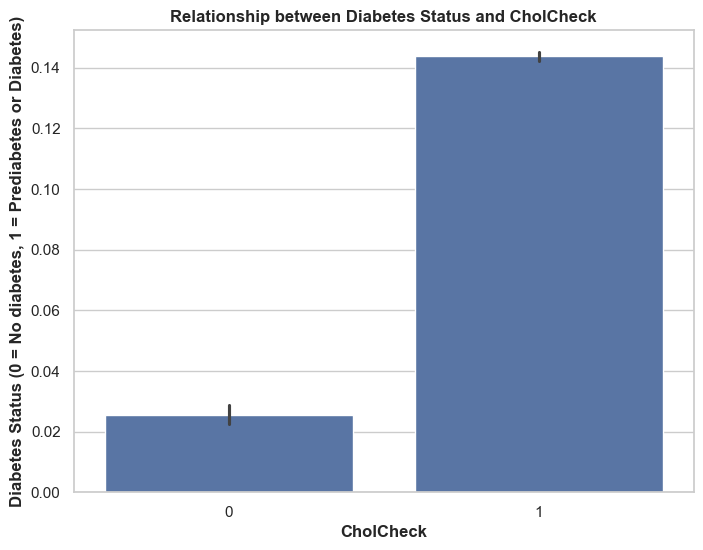

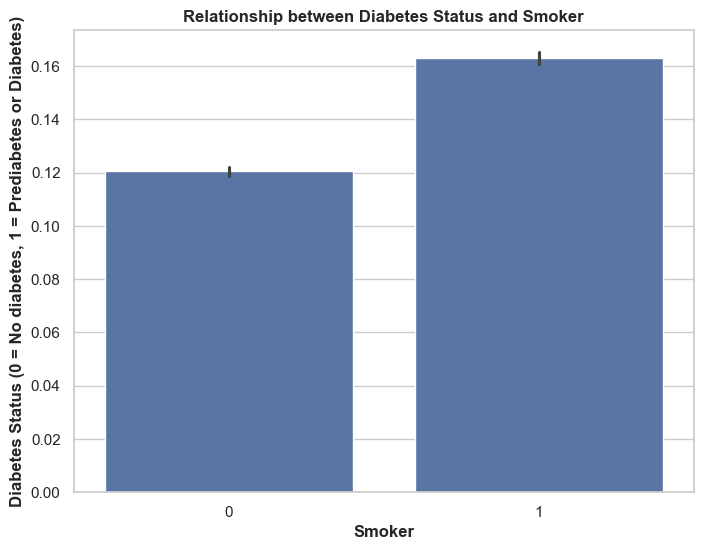

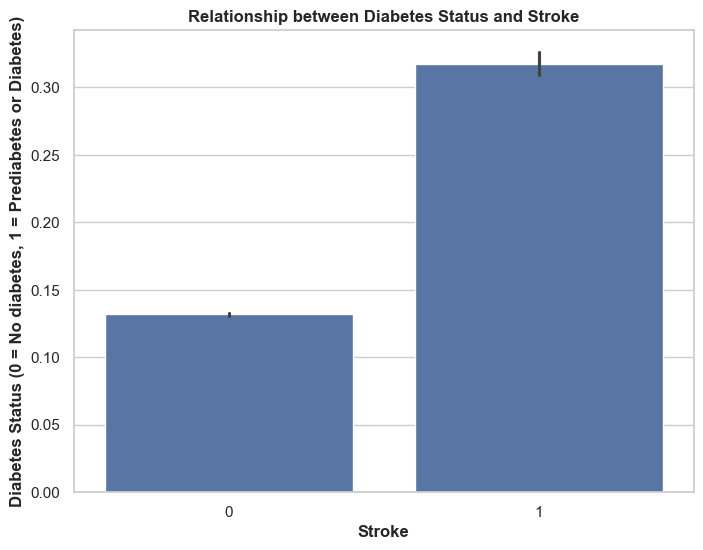

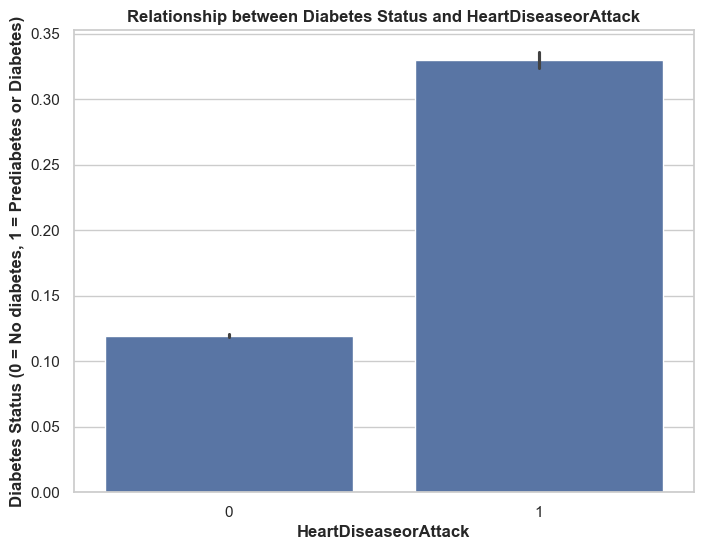

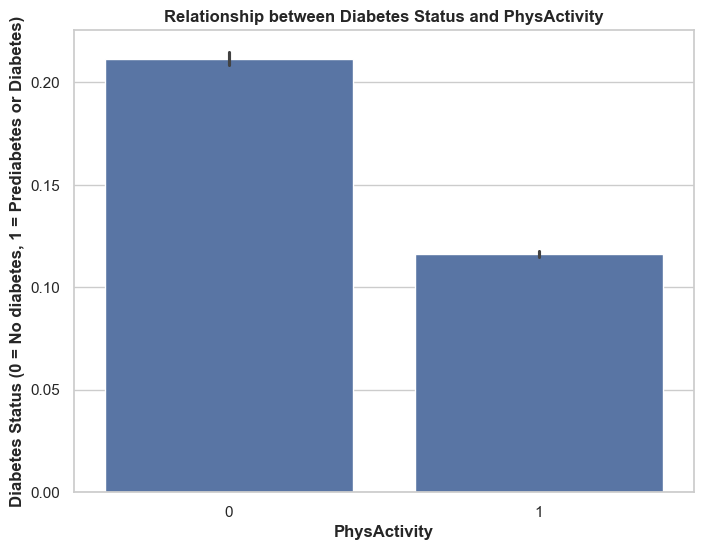

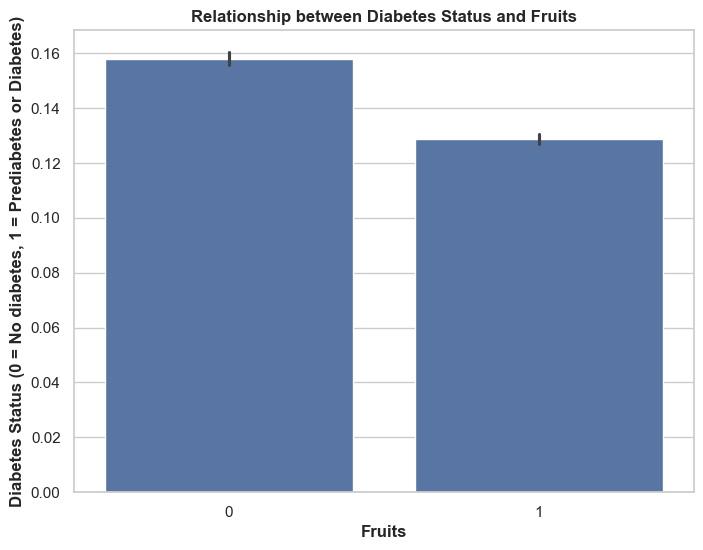

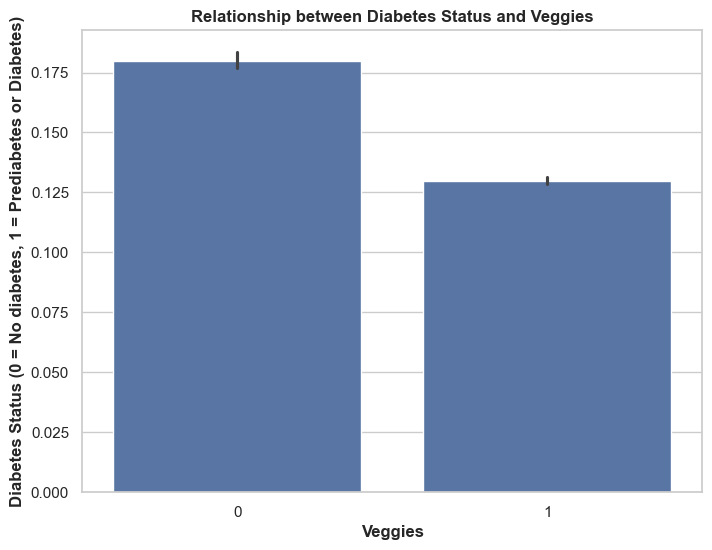

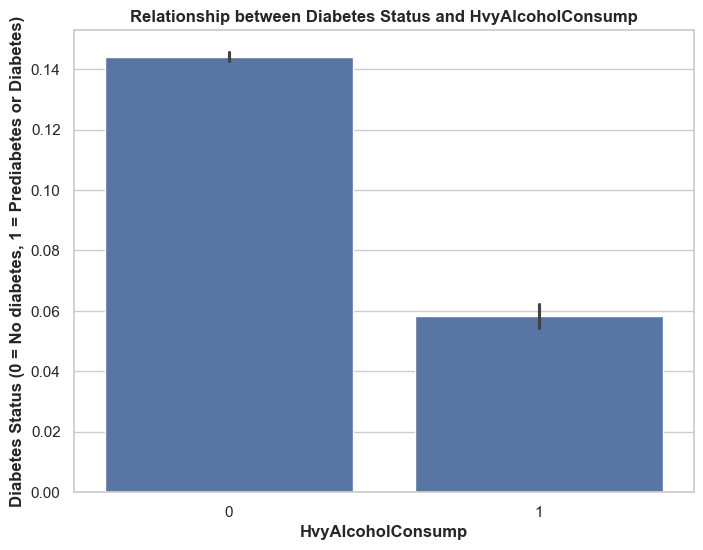

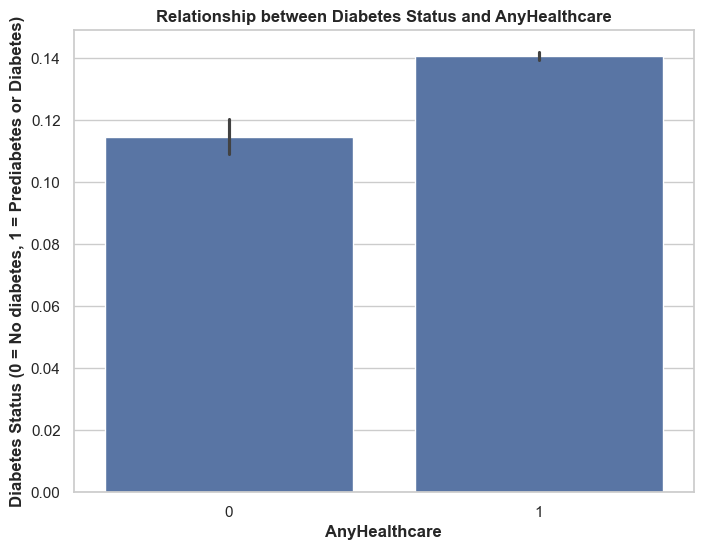

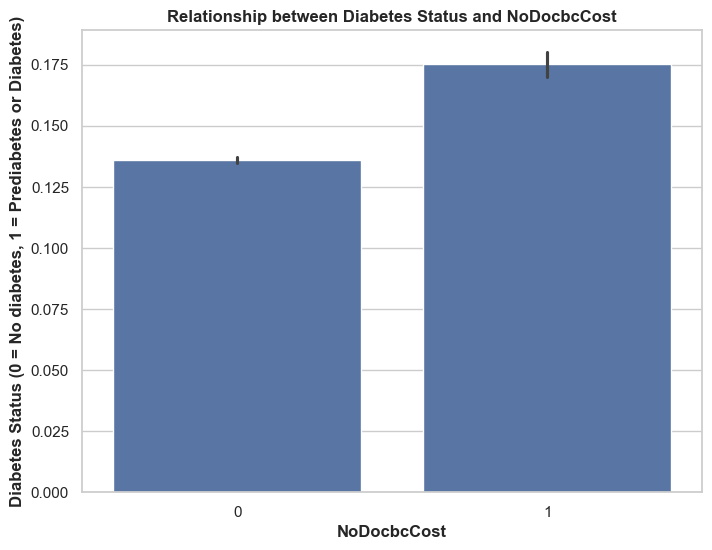

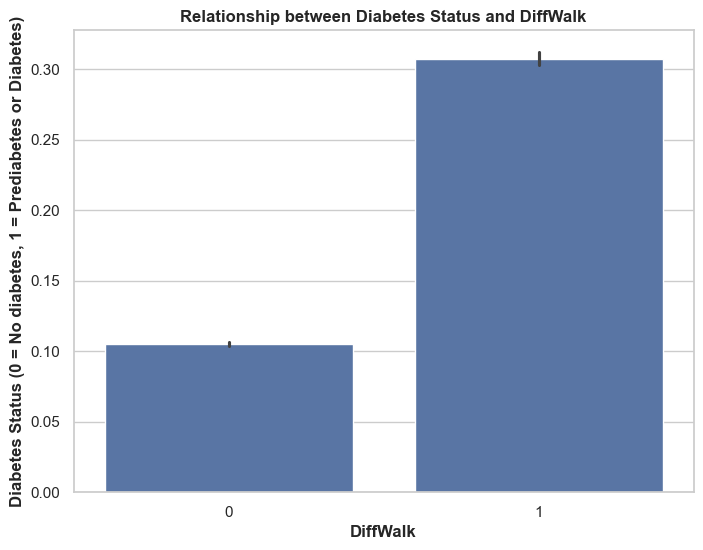

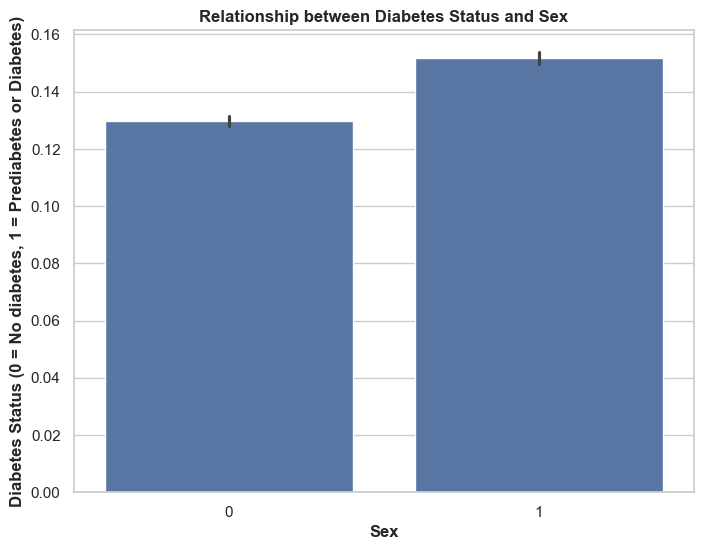

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Raw File Dataset Path (Full) : https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Full%20Dataset.csv?token=GHSAT0AAAAAACTZRV2CDOCYANJTD5X7E2OQZTSEHXQ
# Raw File Dataset Path (50-50): https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/50-50%20Balanced%20Dataset.csv?token=GHSAT0AAAAAACTZRV2DZMBCXNKTGOPFEL7YZTSEGGQ

# Read the data file
df = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Full%20Dataset.csv?token=GHSAT0AAAAAACTZRV2CDOCYANJTD5X7E2OQZTSEHXQ")

# Set plot style
sns.set_theme(style="whitegrid")

# Function to format y-axis labels with "K" for thousands
def format_yaxis(ax):
    ylabels = ax.get_yticks()
    ax.set_yticks(ylabels)
    ax.set_yticklabels([f'{int(y/1000)}K' for y in ylabels])

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes_binary', data=df)
format_yaxis(ax)
plt.title('Distribution of Diabetes Status', fontweight='bold')
plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# 2. Distribution of numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontweight='bold')
for ax in plt.gcf().axes:
    format_yaxis(ax)
plt.show()

# 3. Distribution of binary features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, feature in enumerate(binary_features):
    row, col = divmod(i, 3)
    ax = sns.countplot(x=feature, data=df, ax=axes[row, col])
    format_yaxis(ax)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

# 5. Relationships between features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')
    plt.show()

for feature in binary_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='Diabetes_binary', data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.show()

Chi-Square Test

In [5]:
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 
                       'Education', 'Income']

# Target variable
target = 'Diabetes_binary'

# Perform Chi-Square test
chi2_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Convert results to DataFrame
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index').reset_index()
chi2_results_df.columns = ['Feature', 'Chi2', 'p-value']

# Sort results by Chi2 score in descending order, then by p-value
chi2_results_df.sort_values(by=['Chi2', 'p-value'], ascending=[False, True], inplace=True)
chi2_results_df.reset_index(drop=True, inplace=True)

# Display the results
print(chi2_results_df)

                 Feature          Chi2        p-value
0                GenHlth  22728.069055   0.000000e+00
1                 HighBP  17562.446090   0.000000e+00
2               DiffWalk  12092.319741   0.000000e+00
3               HighChol  10174.074889   0.000000e+00
4                    Age   8795.050614   0.000000e+00
5               PhysHlth   8078.527635   0.000000e+00
6   HeartDiseaseorAttack   7971.155841   0.000000e+00
7                 Income   7003.715091   0.000000e+00
8              Education   4027.112282   0.000000e+00
9           PhysActivity   3539.419370   0.000000e+00
10                Stroke   2838.916547   0.000000e+00
11              MentHlth   1452.095440  6.353743e-287
12             CholCheck   1062.938144  3.751399e-233
13                Smoker    937.055759  8.640172e-206
14     HvyAlcoholConsump    825.118756  1.865932e-181
15               Veggies    811.805975  1.463029e-178
16                Fruits    421.611539   1.088121e-93
17                   Sex    

Model I: Logistic Regression

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Drop ID column as it is not needed for the model
data = df.drop(columns=['ID'])

# Split the data into features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8658
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



Model II: K-Nearest Neighbor

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8468
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     43739
           1       0.40      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



Model III: Decision Tree

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model's performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

# Print results
print('Decision Tree Results:')
print(f'Accuracy: {accuracy_tree:.4f}')
print('Classification Report:')
print(report_tree)

Decision Tree Results:
Accuracy: 0.7982
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     43739
           1       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



Model IV: Random Forest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the model's performance
accuracy_forest = accuracy_score(y_test, y_pred_forest)
report_forest = classification_report(y_test, y_pred_forest)

# Print results
print('Random Forest Results:')
print(f'Accuracy: {accuracy_forest:.4f}')
print('Classification Report:')
print(report_forest)

Random Forest Results:
Accuracy: 0.8599
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



Model V: Naive Bayes Classification

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Naive Bayes doesn't require standardization, but we'll include it for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print results
print('Naive Bayes Classification Results:')
print(f'Accuracy: {accuracy_nb:.4f}')
print('Classification Report:')
print(report_nb)

Naive Bayes Classification Results:
Accuracy: 0.7720
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     43739
           1       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



Again

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Re-read the data file

fulldata = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Full%20Dataset.csv?token=GHSAT0AAAAAACTZRV2CDOCYANJTD5X7E2OQZTSEHXQ")
balanceddata = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/50-50%20Balanced%20Dataset.csv?token=GHSAT0AAAAAACTZRV2DZMBCXNKTGOPFEL7YZTSEGGQ")

# Select top features
top_features = ['GenHlth', 'HighBP']
data = data[top_features + ['Diabetes_binary']]

# Split the data into features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print results
print('Naive Bayes Classification Results:')
print(f'Accuracy: {accuracy_nb:.4f}')
print('Classification Report:')
print(report_nb)

Naive Bayes Classification Results:
Accuracy: 0.7010
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.68      7090
           1       0.68      0.76      0.72      7049

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



Same as above, but Train on Balanced Dataset, then Test against Full Dataset

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Re-read the data files
fulldata = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Full%20Dataset.csv?token=GHSAT0AAAAAACTZRV2CDOCYANJTD5X7E2OQZTSEHXQ")
balanceddata = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/50-50%20Balanced%20Dataset.csv?token=GHSAT0AAAAAACTZRV2DZMBCXNKTGOPFEL7YZTSEGGQ")

# Select top features
top_features = ['GenHlth', 'HighBP']
balanced_data = balanceddata[top_features + ['Diabetes_binary']]
full_data = fulldata[top_features + ['Diabetes_binary']]

# Split the balanced data into features and target for training
X_train = balanced_data.drop(columns=['Diabetes_binary'])
y_train = balanced_data['Diabetes_binary']

# Split the full data into features and target for testing
X_test = full_data.drop(columns=['Diabetes_binary'])
y_test = full_data['Diabetes_binary']

# Standardize the features (optional for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print results
print('Naive Bayes Classification Results:')
print(f'Accuracy: {accuracy_nb:.4f}')
print('Classification Report:')
print(report_nb)

Naive Bayes Classification Results:
Accuracy: 0.6631
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77    218334
           1       0.26      0.75      0.38     35346

    accuracy                           0.66    253680
   macro avg       0.60      0.70      0.58    253680
weighted avg       0.85      0.66      0.71    253680

